In [7]:
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment
import math as m
import tensorflow as tf
import utilities as util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
bells_fs,        bells_wav,        bells_freq,        bells_time,        bells_spec,        bells_argsort,        bells_corr,        bells_nf,        bells_argsort_corr        = util.gather_data('../samples/HandBells.wav')
chords_fs,       chords_wav,       chords_freq,       chords_time,       chords_spec,       chords_argsort,       chords_corr,       chords_nf,       chords_argsort_corr       = util.gather_data('../samples/Chords.wav')
piano_mel_fs,    piano_mel_wav,    piano_mel_freq,    piano_mel_time,    piano_mel_spec,    piano_mel_argsort,    piano_mel_corr,    piano_mel_nf,    piano_mel_argsort_corr    = util.gather_data('../samples/Piano.wav')
guitar_tun_fs,   guitar_tun_wav,   guitar_tun_freq,   guitar_tun_time,   guitar_tun_spec,   guitar_tun_argsort,   guitar_tun_corr,   guitar_tun_nf,   guitar_tun_argsort_corr   = util.gather_data('../samples/Guitar.wav')
piano_note_fs,   piano_note_wav,   piano_note_freq,   piano_note_time,   piano_note_spec,   piano_note_argsort,   piano_note_corr,   piano_note_nf,   piano_note_argsort_corr   = util.gather_data('../samples/Piano_C_Major_Note.wav')
tbone_note_fs,   tbone_note_wav,   tbone_note_freq,   tbone_note_time,   tbone_note_spec,   tbone_note_argsort,   tbone_note_corr,   tbone_note_nf,   tbone_note_argsort_corr   = util.gather_data('../samples/Trombone_C_Major_Note.wav')
guitar_note_fs,  guitar_note_wav,  guitar_note_freq,  guitar_note_time,  guitar_note_spec,  guitar_note_argsort,  guitar_note_corr,  guitar_note_nf,  guitar_note_argsort_corr  = util.gather_data('../samples/Guitar_C_Major_Note.wav')
piano_scale_fs,  piano_scale_wav,  piano_scale_freq,  piano_scale_time,  piano_scale_spec,  piano_scale_argsort,  piano_scale_corr,  piano_scale_nf,  piano_scale_argsort_corr  = util.gather_data('../samples/Piano_C_Major_Scale.wav')
tbone_scale_fs,  tbone_scale_wav,  tbone_scale_freq,  tbone_scale_time,  tbone_scale_spec,  tbone_scale_argsort,  tbone_scale_corr,  tbone_scale_nf,  tbone_scale_argsort_corr  = util.gather_data('../samples/Trombone_C_Major_Scale.wav')
guitar_scale_fs, guitar_scale_wav, guitar_scale_freq, guitar_scale_time, guitar_scale_spec, guitar_scale_argsort, guitar_scale_corr, guitar_scale_nf, guitar_scale_argsort_corr = util.gather_data('../samples/Guitar_C_Major_Scale.wav')

/Users/Peeke/Honors/refactored-robot/Notebooks/utilities.py:112: RuntimeWarning: invalid value encountered in true_divide
  weights = vals/sums # the weights for each time


In [110]:
def normal_peak(vals, freq):
    import numpy as np
    if len(freq) == 1: return vals
    df = freq[1] - freq[0]
    sums = vals.sum(0, keepdims=True) 
    weights = vals/sums # the weights for each time
    mean = (weights*freq[:,None]).sum(0, keepdims=True) 
    var = (((freq[:,None]-mean)**2)*weights).sum(0)/df 
    peak = 1/np.sqrt(2*np.pi*var)
    peak *= df*sums.squeeze()
    return peak


In [10]:
import numpy as np

def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return tf.matmul(arg, arg) + arg

In [112]:
freq = guitar_note_freq
vals = guitar_note_spec

df = (freq[1] - freq[0])

sums = tf.reduce_sum(vals, 0, keepdims=True)

weights = vals/sums

mean = tf.reduce_sum(weights*freq[:,None], 0, keepdims=True) # the weighted mean

var = tf.truediv(tf.reduce_sum(((freq[:,None]-mean)**2)*weights, 0),df)

denom_var = tf.multiply(tf.constant(2.0, dtype='float64'), m.pi)

denom_var_mult = tf.scalar_mul(denom_var, var)
# Start of nans.. Sometimes slighty < 0...
# denom = tf.sqrt(denom_var_mult) if (denom_var_mult > 0) else 0
denom = tf.sqrt(tf.abs(denom_var_mult))

dst_peak = tf.truediv(tf.constant(1.0, dtype='float64'),denom)

peak = dst_peak * df * tf.squeeze(sums) if (dst_peak != 'Nan') else 0

In [108]:
util.normal_peak(vals, freq)

array([3.68854778e+01, 4.97238175e+01, 3.90355817e+05, 7.19992699e+05,
       5.08514053e+05, 3.60702271e+05, 2.38383047e+05, 1.22335667e+05,
       7.18542279e+04, 3.69670048e+04, 1.77540660e+04, 1.23397450e+03,
       4.70679549e+01])

In [113]:
normal_peak(vals, freq)

array([3.68854778e+01, 4.97238175e+01, 3.90355817e+05, 7.19992699e+05,
       5.08514053e+05, 3.60702271e+05, 2.38383047e+05, 1.22335667e+05,
       7.18542279e+04, 3.69670048e+04, 1.77540660e+04, 1.23397450e+03,
       4.70679549e+01])

In [114]:
with tf.Session() as sess:
#     print(sess.run(df))
    print('sums ', sess.run(sums))
    print()
    print('weights ', sess.run(weights))
    print()
    print('mean ', sess.run(mean))
    print()
    print('var ', sess.run(var))
    print()
    print('denom_var ', sess.run(denom_var))
    print()
    print('denom_var_mult ', sess.run(denom_var_mult))
    print()
    print('denom ', sess.run(denom))
    print()
    print('dst_peak ', sess.run(dst_peak))
    print()
    print('peak ', sess.run(peak))

sums  [[4.21674731e+04 4.95493161e+04 3.32534511e+07 4.23357088e+07
  3.01628937e+07 2.23053266e+07 1.58615228e+07 9.90821809e+06
  6.70954539e+06 4.21179227e+06 2.55619567e+06 4.32600794e+05
  4.89599496e+04]]

weights  [[2.79018070e-07 3.75496728e-07 1.56758814e-06 ... 5.75175341e-06
  2.59929049e-06 3.97297561e-05]
 [8.20677351e-08 9.37552786e-08 4.07874785e-08 ... 2.72302851e-07
  1.46279644e-07 2.46432259e-06]
 [1.30650075e-06 1.20383666e-06 4.21112279e-08 ... 2.47298356e-07
  2.26944315e-07 1.40460929e-06]
 ...
 [2.71999373e-11 2.97041284e-11 9.35773192e-14 ... 1.00862810e-12
  4.37347574e-13 5.61026193e-11]
 [2.83566257e-11 4.93894387e-12 1.21124508e-13 ... 7.79248884e-15
  3.95149418e-12 1.64451011e-10]
 [2.96268578e-10 1.15795819e-11 1.60585423e-14 ... 2.81811007e-13
  1.90187097e-12 2.14572565e-11]]

mean  [[671.01424371 476.99966505 201.21522074 220.30855984 220.11057917
  221.93753821 224.28078483 222.6201545  224.97063873 230.77858168
  238.35951369 266.67262277 546.212110

In [ ]:
def gather_data(filename):
    import numpy as np
    from scipy.io import wavfile
    import scipy.signal as sg
    fs, wav = wavfile.read(filename)
    wav = wav.astype(np.double)
    freq, time, spec = sg.spectrogram(wav, fs, nperseg=16384)
    arg_sort = np.argsort(spec,  axis=0)
    corrections, nf = make_corrections(spec,  freq)
    arg_sort_corr = np.argsort(corrections,  axis=0)
    return fs, wav, freq, time, spec, arg_sort, corrections, nf, arg_sort_corr

In [59]:
guitar_note_freq.shape

(8193,)

In [94]:
num, denom = sg.iirfilter(17, [20,20000], analog=True, ftype='butter')

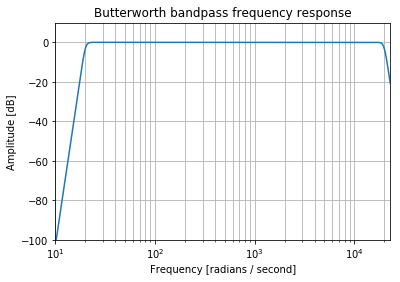

In [95]:
w, h = sg.freqs(num, denom, 22000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_xscale('log')
ax.set_title('Butterworth bandpass frequency response')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 23000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [96]:
sg.lfilter(num, denom, guitar_note_freq)

array([ 0.00000000e+00,  3.46850142e+73, -7.51070233e+78, ...,
                   nan,             nan,             nan])

/Users/Peeke/Honors/.env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


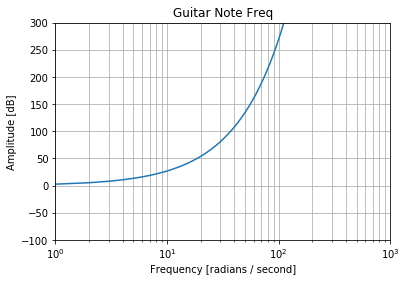

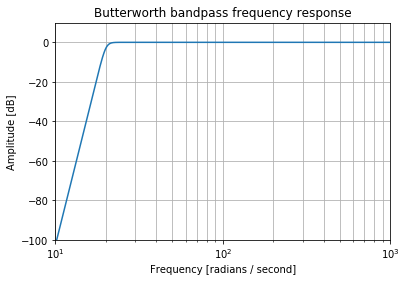

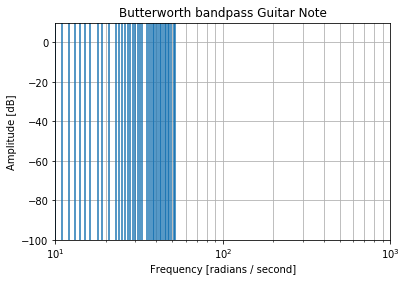

In [103]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(guitar_note_freq)
ax.set_xscale('log')
ax.set_title('Guitar Note Freq')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((0, 1000, -100, 300))
ax.grid(which='both', axis='both')
plt.show()

w, h = sg.freqs(num, denom, 22000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_xscale('log')
ax.set_title('Butterworth bandpass frequency response')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

data = sg.lfilter(num, denom, guitar_note_freq)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
ax.set_title('Butterworth bandpass Guitar Note')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()